In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [161]:
"""Importing the private and public spending on construction in the United States from 2002 through 2013 
with partial data for 2014 (data source: US Census Bureau)"""

df_cons = pd.read_csv('ConstructionTimeSeriesDataV2.csv')
df_cons

,Month,Month-Year,TotalConstruction,PrivateConstruction,PublicConstruction
0,1,2-Jan,59516,45273,14243
1,2,2-Feb,58588,44475,14113
2,3,2-Mar,63782,49396,14386
3,4,2-Apr,69504,53283,16221
4,5,2-May,73384,55009,18375
...,...,...,...,...,...
141,142,13-Oct,85193,59370,25823
142,143,13-Nov,77931,55191,22741
143,144,13-Dec,71502,52132,19369
144,145,14-Jan,64661,47827,16834


In [162]:
"""Converts the index of the dataframe into a time format."""
df_cons.index = pd.date_range(freq='m', start=pd.Timestamp(year=2002, month=1, day=31), 
                              periods = len(df_cons['TotalConstruction']))
df_cons

,Month,Month-Year,TotalConstruction,PrivateConstruction,PublicConstruction
2002-01-31,1,2-Jan,59516,45273,14243
2002-02-28,2,2-Feb,58588,44475,14113
2002-03-31,3,2-Mar,63782,49396,14386
2002-04-30,4,2-Apr,69504,53283,16221
2002-05-31,5,2-May,73384,55009,18375
...,...,...,...,...,...
2013-10-31,142,13-Oct,85193,59370,25823
2013-11-30,143,13-Nov,77931,55191,22741
2013-12-31,144,13-Dec,71502,52132,19369
2014-01-31,145,14-Jan,64661,47827,16834


#### For the majority of time from 2002 through 2014, there has been a sizeable difference on the amount spent on construction between the private and public sectors. The shaded region in the graph below highlights a time frame (May 2009 - June 2012) where the spending between the two sectors is at its closest. It represents 25% of the data, and September 2010 was specifically the closest month of spending.

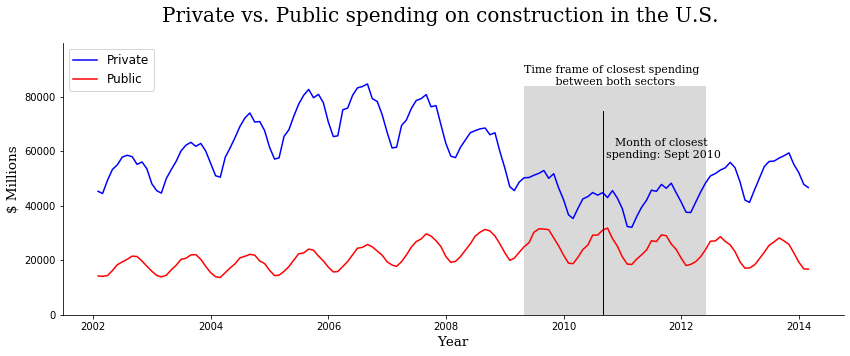

In [186]:
fig, ax = plt.subplots()
ax.plot(df_cons['PrivateConstruction'], label = 'Private', color = 'blue')
ax.plot(df_cons['PublicConstruction'], label = 'Public', color = 'red')
ax.legend(loc = 2, fontsize = '12')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Year', fontname = 'Serif', fontsize = '13.5')
ax.set_ylabel('$ Millions', fontname = 'Serif', fontsize = '13.5')
ax.set_ylim(0, max(df_cons['PrivateConstruction']) + 15000)
ax.axvspan(datetime(2009,5,1), datetime(2012,6,1), ymax = 0.84, facecolor = 'k', alpha = 0.15)
ax.axvline(datetime(2010,9,1), ymax = 0.75, linewidth=1, color='k', linestyle='-')

ax.text(0.705, 0.88, 'Time frame of closest spending \n between both sectors' ,fontsize = 11,
        verticalalignment='center',horizontalalignment='center',fontname='Serif', transform = ax.transAxes)
ax.text(0.769, 0.61, "Month of closest \nspending: Sept 2010", fontsize = 11,
        verticalalignment='center',horizontalalignment='center',fontname='Serif', transform = ax.transAxes)

fig.suptitle('Private vs. Public spending on construction in the U.S.', fontname = 'Serif', fontsize = '20')
fig.set_size_inches(14, 5)